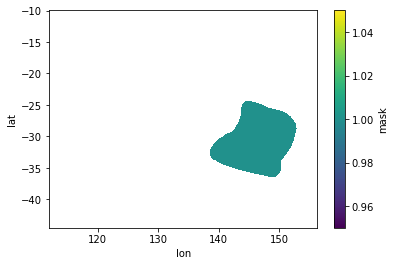

In [1]:
import xarray as xr
import numpy as np
import geopandas as gp
import regionmask

# read in the focus region shapefile
drought_focusReg = gp.read_file('/g/data/w97/ad9701/drought_2017to2020/drought_focusArea/smooth_polygon_drought_focusArea.shp')

# get the lat-lon coordinates to create the mask for
# I'm using the agcd data here
sample_file = '/g/data/zv2/agcd/v1/precip/total/r005/01day/agcd_v1_precip_total_r005_daily_2017.nc'
ds = xr.open_dataset(sample_file)

# create a mask of the polygon for the lat-long values in ds. The mask would contain '0' inside the region; nan otherwise
da_mask_zeros = regionmask.mask_geopandas(geodataframe = drought_focusReg, lon_or_obj = ds.lon.values, lat = ds.lat.values)
# setting the points inside the region to 1
da_mask = xr.where(da_mask_zeros == 0, 1, np.nan)
da_mask.plot()

# save the mask into a netcdf file
out_file = '/g/data/w97/ad9701/drought_2017to2020/drought_focusArea/agcd_mask_drought_focusArea.nc'
da_mask.to_netcdf(out_file)